In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
X, y = make_moons(100, noise=0.25,random_state=2)

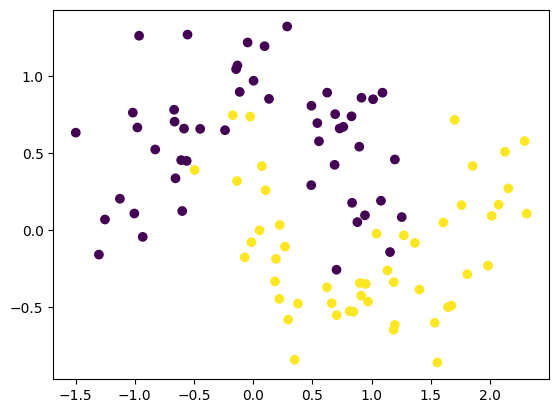

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [4]:
model1 = Sequential()

model1.add(Dense(128,input_dim=2, activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history1 = model1.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 [==============================] - 13s 1ms/step


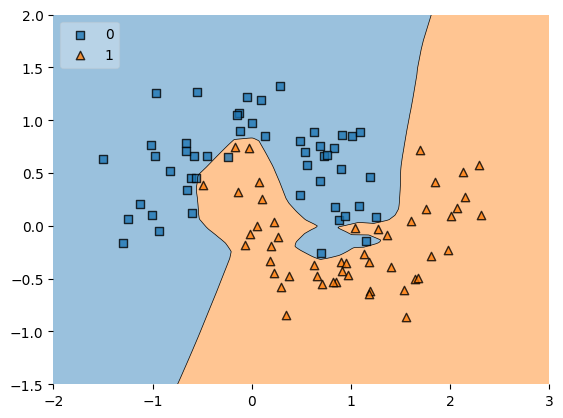

In [6]:
plot_decision_regions(X, y.astype('int'), clf=model1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

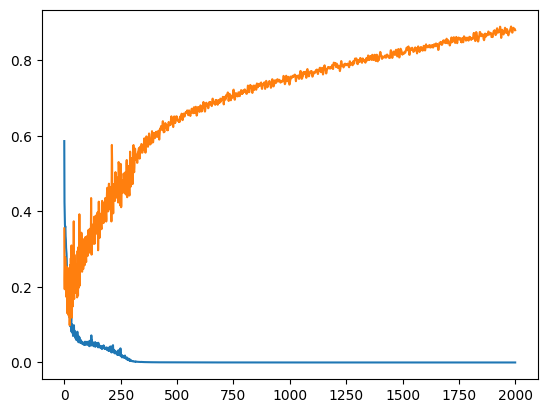

In [7]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [19]:
model2 = Sequential()

model2.add(Dense(128,input_dim=2, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.001)))
model2.add(Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.001)))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               384       
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history2 = model2.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 [==============================] - 13s 1ms/step


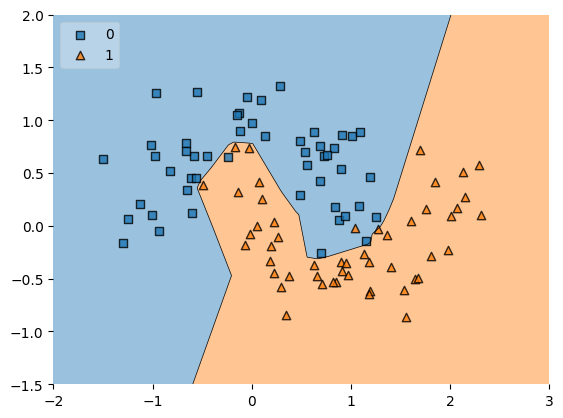

In [21]:
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

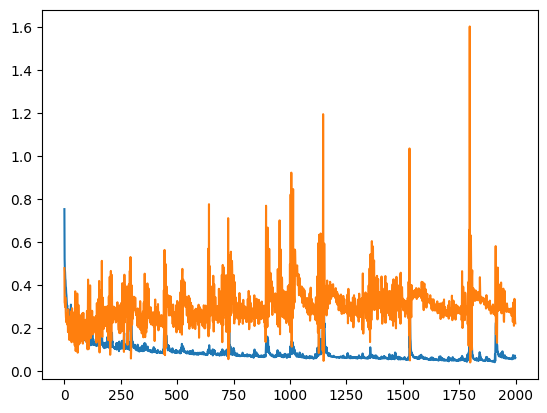

In [22]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

In [23]:
model1_weight_layer1 = model1.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)

<Axes: >

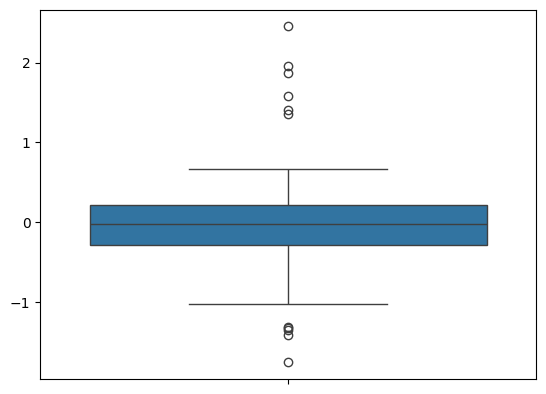

In [24]:
sns.boxplot(model1_weight_layer1)

<Axes: >

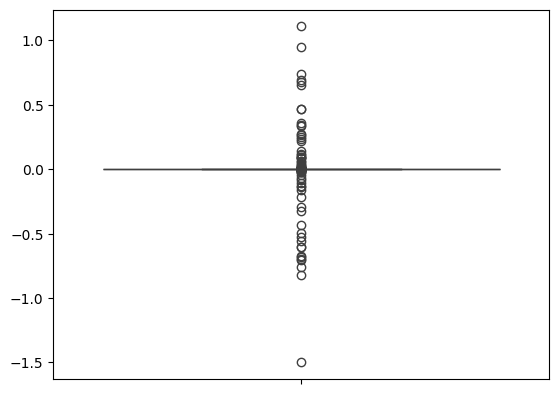

In [25]:
sns.boxplot(model2_weight_layer1)

In [26]:
model1_weight_layer1.min()

-1.7497127

In [16]:
model2_weight_layer1.min()

-1.9061695

C:\Users\Asus\AppData\Local\Temp\ipykernel_8272\2224180084.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model1_weight_layer1)
C:\Users\Asus\AppData\Local\Temp\ipykernel_8272\2224180084.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model2_weight_layer1)


<Axes: ylabel='Density'>

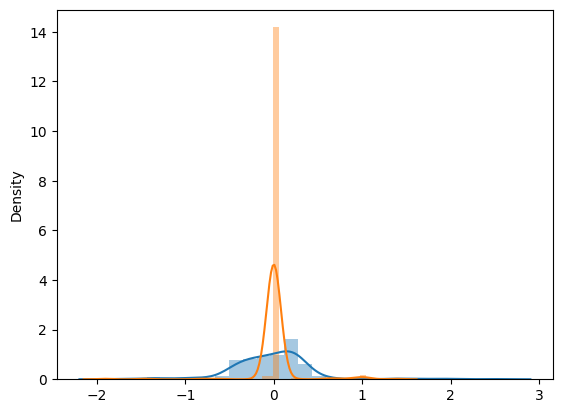

In [17]:
sns.distplot(model1_weight_layer1)
sns.distplot(model2_weight_layer1)

In [18]:
model1.get_weights()[0].reshape(256)

array([-0.466624  , -0.0942561 ,  0.27558753, -0.38645354,  0.19998375,
        0.2046455 , -0.09764095, -0.05112896, -0.10102316, -0.5703596 ,
        0.15394609,  0.1080452 ,  0.26983306, -0.33232418, -0.4354762 ,
        0.320249  , -0.02293909, -0.38533473, -0.20946084,  0.30057606,
       -0.17478177,  0.2617252 ,  0.18858342,  0.23007017, -0.3943443 ,
        0.11892951,  0.21729204, -0.3389411 ,  0.22973277, -0.34799972,
       -0.58327395, -0.15336232,  0.06379773, -0.17744996, -0.08385862,
       -0.5782602 , -0.15844163, -0.27702972,  0.29631948, -0.34263274,
       -0.1886299 , -0.33472276, -0.12699412, -0.19401632,  0.35472435,
       -0.43918326,  0.28373963, -0.4553609 , -0.40918344, -0.43489465,
        0.11564156, -0.12643075, -0.0257601 , -0.3043299 ,  0.2495081 ,
       -0.13218631, -0.21047227, -0.09196877,  0.269329  , -0.251534  ,
       -0.33330813,  0.19200255,  0.11182139,  0.06287731,  0.17496522,
        0.2135086 , -0.4433399 ,  0.3053889 ,  0.28515103,  0.14